In [ ]:
!pip -q install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download alamintokdershoukhin/indian-pines-dataset

Dataset URL: https://www.kaggle.com/datasets/alamintokdershoukhin/indian-pines-dataset
License(s): MIT
 88% 5.00M/5.68M [00:00<00:00, 45.1MB/s]
100% 5.68M/5.68M [00:00<00:00, 49.9MB/s]


In [ ]:
!unzip -q indian-pines-dataset.zip

In [ ]:
!kaggle datasets download abhijeetgo/indian-pines-hyperspectral-dataset

Dataset URL: https://www.kaggle.com/datasets/abhijeetgo/indian-pines-hyperspectral-dataset
License(s): CC0-1.0
  0% 0.00/5.54M [00:00<?, ?B/s]
100% 5.54M/5.54M [00:00<00:00, 75.2MB/s]


In [ ]:
!unzip -q indian-pines-hyperspectral-dataset

In [ ]:
!wget 'https://www.ehu.eus/ccwintco/uploads/2/22/Indian_pines.mat'

--2024-08-29 18:49:57--  https://www.ehu.eus/ccwintco/uploads/2/22/Indian_pines.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6296374 (6.0M)
Saving to: ‘Indian_pines.mat’

Indian_pines.mat    100%[===================>]   6.00M  2.49MB/s    in 2.4s    

2024-08-29 18:50:00 (2.49 MB/s) - ‘Indian_pines.mat’ saved [6296374/6296374]



https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes

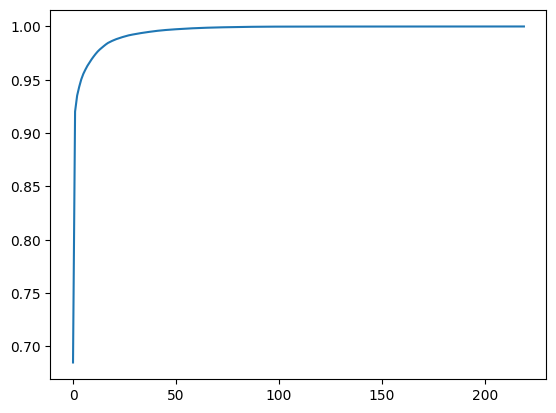

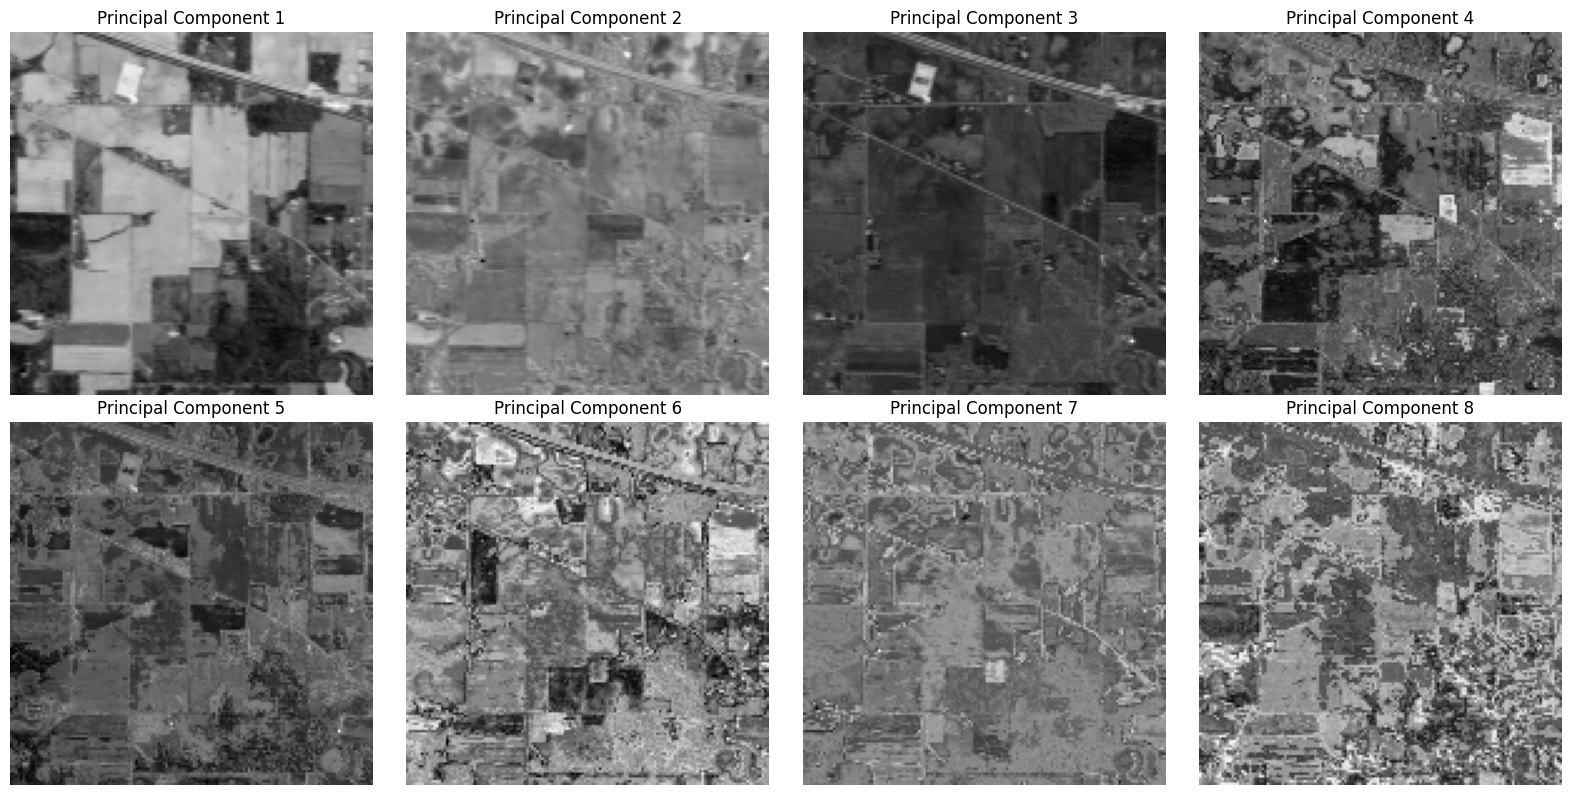

In [ ]:
import scipy.io as sio
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm


hyperspectral_data = scipy.io.loadmat('Indian_pines')['indian_pines']
hyperspectral_data = hyperspectral_data.astype(np.float64) / 65535.0

y = scipy.io.loadmat('Indian_pines_gt.mat')['indian_pines_gt']

y= y.reshape((145*145,1))
# Assuming y is your target variable
y = y.ravel()
X= hyperspectral_data.reshape((145*145,220))
pca = PCA(); pcX = pca.fit_transform(X)
ev=pca.explained_variance_ratio_ ; cumulativeVar = np.cumsum(ev)
plt.plot(cumulativeVar)

# Visualize the first 8 principal components
pca = PCA(n_components=8)  # Number of principal components to keep
pca.fit(X)
principal_components = pca.transform(X)

# Reshape each principal component into the dimensions of the hyperspectral image
principal_components_images = []
for i in range(8):
    principal_component_image = principal_components[:, i].reshape(hyperspectral_data.shape[0], hyperspectral_data.shape[1])
    principal_components_images.append(principal_component_image)

# Visualize the principal components as images
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(principal_components_images[i], cmap='gray')
    plt.title('Principal Component {}'.format(i + 1))
    plt.axis('off')
plt.tight_layout()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

nComp = 100
pca = PCA(n_components=nComp)
pca.fit(X_train)
pcX_train = pca.transform(X_train)


clf = svm.SVC(kernel='poly') # Non_Linear Kernel

#Train the model using the training sets
clf.fit(pcX_train, y_train)

pcX_test = pca.transform(X_test)

y_pred = clf.predict(pcX_test)

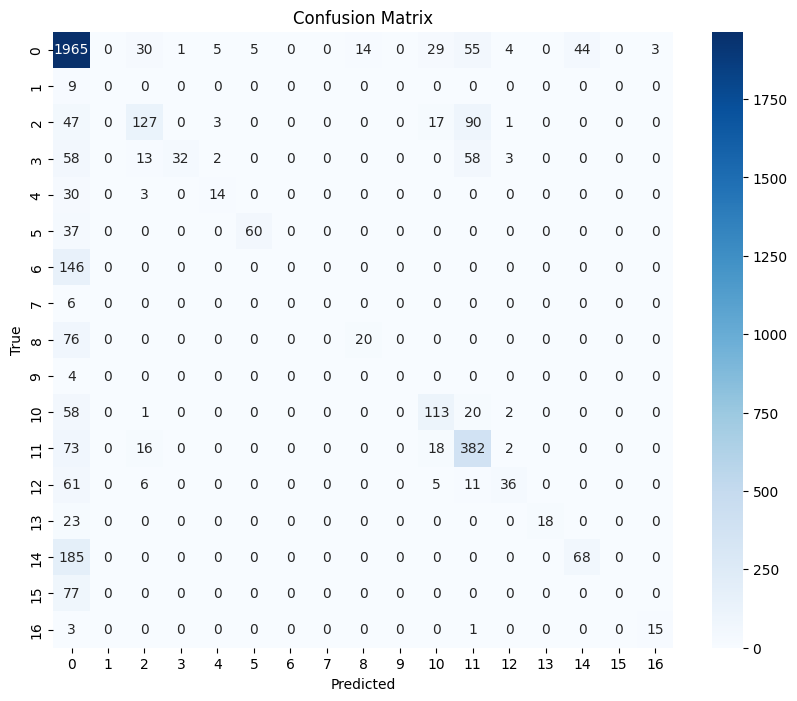

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6777645659928656
